In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp


In [2]:
#M_p = 2.8435*(10**27)
M_p = 1
xi_0 = 0.21674
b_1 =-1.199376
b_2 =0.022616
b_3 = 0.83335
phi_0 = 1.57353
lambda_0 = 6.9*(10**(-10))
N_e0 = 0


# Fig. 2: Inflationnary potential

## Plot Ω² (ϕ)

In [3]:
#Set of values to plot as a function of phi
phi_axis = np.arange(0.1, 10*M_p, 0.1)

In [4]:
#Omega² (Eq. (3.2))
def OMEGA_2(phi):
    return 1 + (xi(phi)*(phi**2) / (M_p**2))

In [5]:
#Eq. (5.3)
def xi(phi):
    return xi_0 * (1 + (b_3 * np.log((phi**2) / (phi_0**2))))

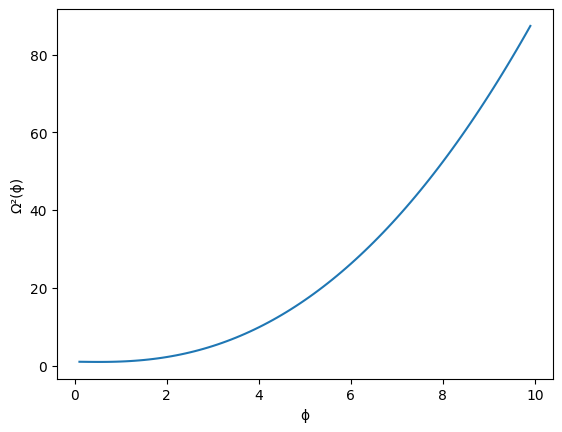

In [9]:
fig, ax = plt.subplots()
plt.plot(phi_axis, OMEGA_2(phi_axis))
ax.set_xlabel("ϕ")
ax.set_ylabel("Ω²(ϕ)")     
plt.show()


## Plot V(ϕ) and U(ϕ)

In [11]:
#V(ϕ)
def V(phi):
    return (lambda_0/(4*3*2) )* (1 - (2*(1+b_1)*np.log((phi**2)/(phi_0**2))) + (2 * (1+b_2) * (np.log((phi**2)/(phi_0**2)))**2)) * phi**4

In [12]:
def U(phi) :
    return V(phi) / (OMEGA_2(phi)**2)

TypeError: 'Line2D' object is not callable

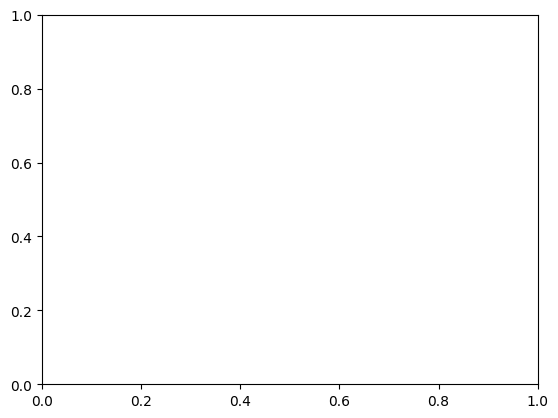

In [19]:
fig, ax = plt.subplots()
ax.plot(phi_axis, V(phi_axis), color='tab:blue', label = "V")
ax.plot(phi_axis, U(phi_axis), color='tab:orange', label = "U")
ax.legend()
ax.set_xlabel("ϕ"),
ax.set_ylabel("V(ϕ),U(ϕ)")     
plt.show()

In [13]:
#dphi/dchi
PHI = lambda chi, phi:  np.sqrt((M_p**2 * (M_p**2 + xi(phi) * phi**2)) + (6 * xi(phi)**2 * M_p**2 * phi**2)) / (M_p**2 + xi(phi) * phi**2) 

In [14]:
#solve phi(chi)
lower_bound = 1e-30
upper_bound = 10 * M_p

chi_eval = np.arange(lower_bound, upper_bound, 1e21)
sol_phi = solve_ivp(PHI, [lower_bound, upper_bound], [0.1], "RK45", t_eval = chi_eval)

In [21]:
final = U(sol_phi.y[0].astype(float)) 

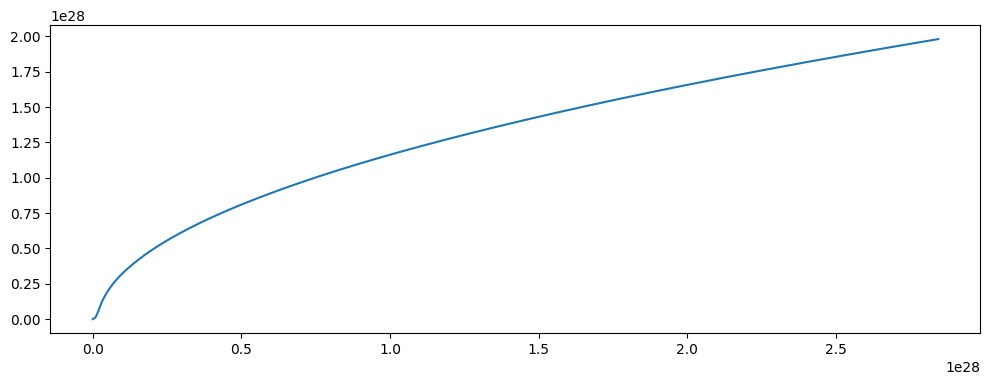

In [22]:
plt.figure(figsize = (12,4))
plt.plot(chi_eval, sol_phi.y[0])
plt.show()


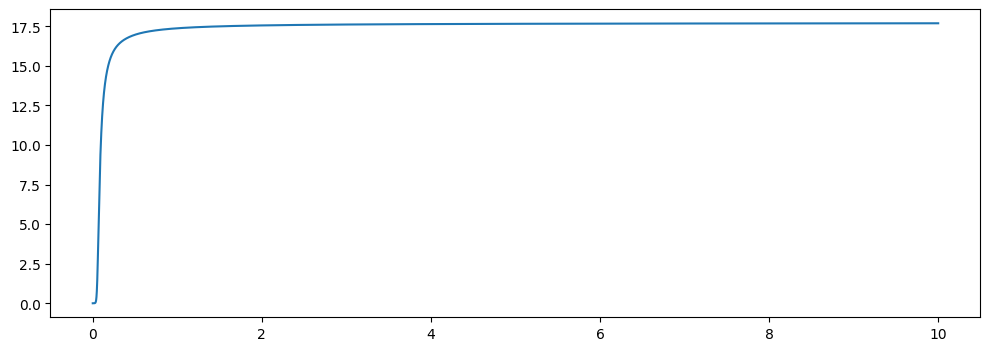

[1.75192365e-013 5.40797876e+077 8.90472482e+078 ... 1.15651549e+101
 1.15651549e+101 1.15651549e+101]


In [23]:
plt.figure(figsize = (12, 4))
plt.plot(chi_eval / M_p, final * (1e10 * M_p**(-4)))
plt.show()
print(final)

# Fig. 3: Primordial power spectrum

In [31]:
DEL_N_E = N_e - N_e0

In [35]:
N_e = np.arange(0.0, 43.5, 0.1)
print(N_e)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1
 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5
 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9
 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3
 15.4 15.5 15.6 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7
 16.8 16.9 17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1
 18.2 18.3 18.4 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3 19.4 19.5
 19.6 

In [33]:
LOGU = lambda phi, U: np.gradient(np.log(U(phi)))

In [37]:
X = lambda N_e, X: (-3*X) + ((X**3)/(2 * M_p**2)) - (3 * M_p**2 - X**2 / 2) * LOGU(phi)
sol_X = solve_ivp(X, [N_e[0], N_e[-1]], [0], "RK45", t_eval = N_e)

NameError: name 'phi' is not defined

In [ ]:
CHI_NE = lambda N_e, chi_Ne:     

In [ ]:
def H(N_e, chi_Ne):
    return np.sqrt(U(chi_Ne(N_e)) / ((3-eps_H) * M_p**2)
    

In [45]:
k = k_0 * (H(N_e)/H_0) * np.exp(DEL_N_E)

In [ ]:
def P(k):
    return (k**3 / (2 * np.pi**2)) * np.absolute(u(k) / z)**2